In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
#import data set
df_all = pd.read_pickle(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/02 Data/Prepared Data/final_dataset.pkl')

In [3]:
df_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_freq', 'order_freq_flag',
       'gender', 'state', 'age', 'date_joined', 'number_dependants',
       'family_status', 'income', 'region', 'low_order_flag', 'age_profile',
       'department', 'income_profile', 'family_profile'],
      dtype='object')

In [4]:
df_all.shape

(32404859, 37)

1. What are the busiest days of the week?

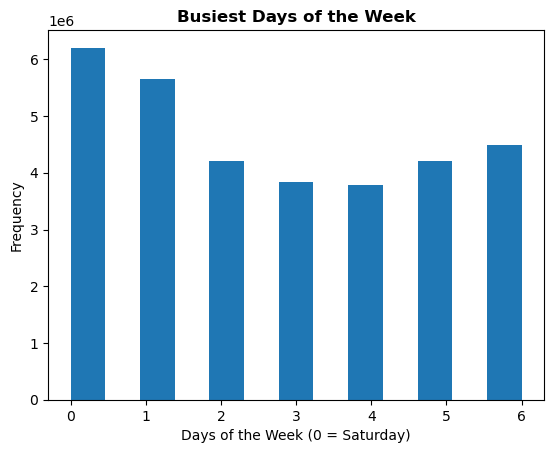

In [5]:
#bar chart
busiest_days = df_all['orders_day_of_week'].plot.hist(bins = 13)
plt.title('Busiest Days of the Week', fontweight = 'bold')
plt.xlabel('Days of the Week (0 = Saturday)')
plt.show()

Saturday and Sunday are the busiest days of the week.

1B. What is the busiest hour of the day?

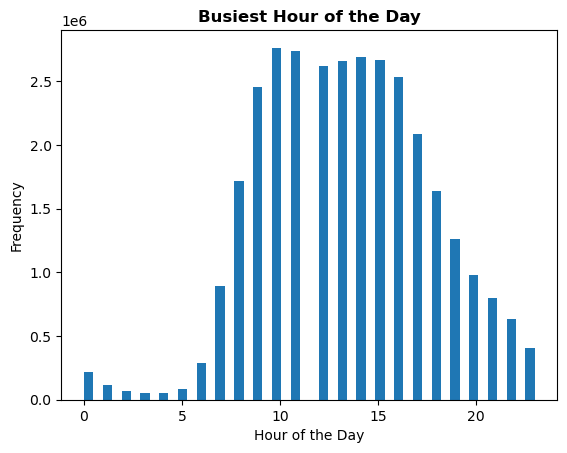

In [6]:
#bar chart
busiest_hours = df_all['order_hour_of_day'].plot.hist(bins = 48)
plt.title('Busiest Hour of the Day', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.show()

2. Times of the day when customers spend the most money:

In [7]:
#Total price spent according to the time of day
busiest_hours_price = df_all.groupby('order_hour_of_day').agg({'prices' : ['sum']})
busiest_hours_price = busiest_hours_price.sort_values(by=('prices', 'sum'), ascending=False)
busiest_hours_price

,prices
,sum
order_hour_of_day,
11,33268554.8
10,32868237.5
15,32400773.8
16,31793097.5
14,31569115.4
12,31280439.7
13,30541285.8
9,28830061.7


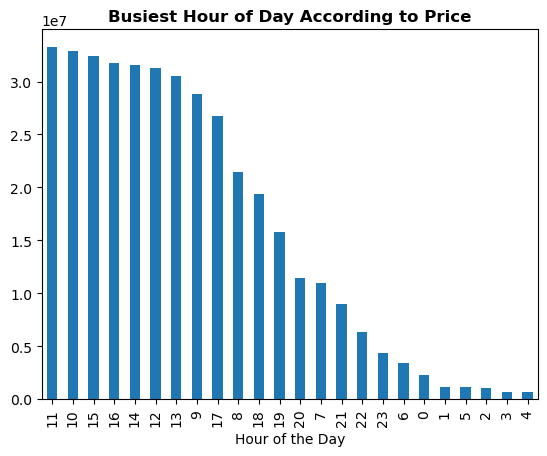

In [8]:
#bar chart for busiest hour of day according to the price
busiest_hours_price_bar = busiest_hours_price.plot.bar(legend = None)
plt.title('Busiest Hour of Day According to Price', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.show()

11 is the busiest hour of the day, according to the price.

In [9]:
busiest_hour_dept = df_all[df_all['order_hour_of_day'] == 11]

In [10]:
busiest_hour_dept['department'].value_counts(dropna = False)

produce            796168
dairy eggs         451953
snacks             254676
beverages          234133
frozen             177203
pantry             161397
bakery              98007
canned goods        93032
deli                89341
dry goods pasta     72273
household           63906
meat seafood        60280
breakfast           58644
personal care       36747
babies              31896
international       23101
alcohol             13800
pets                 7879
missing              5809
other                2977
bulk                 2918
Name: department, dtype: int64

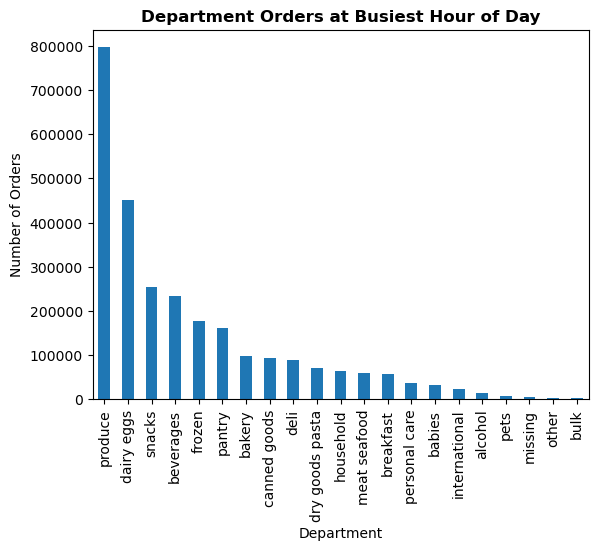

In [11]:
#bar chart busiest hour of day by department
dept_count = busiest_hour_dept['department'].value_counts(dropna=False)
busiest_dept = dept_count.plot.bar()
plt.title('Department Orders at Busiest Hour of Day', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [12]:
df_all['spending_flag'].value_counts(dropna = False)

Low spender     31769965
High spender      634894
Name: spending_flag, dtype: int64

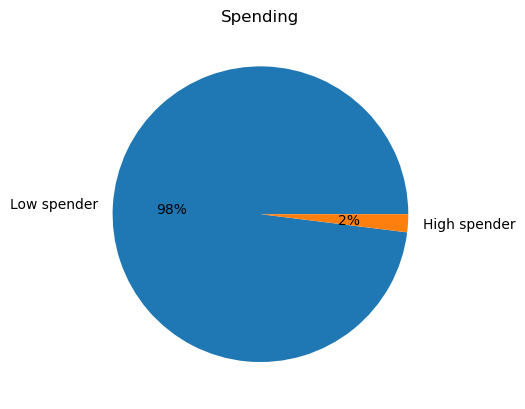

In [13]:
#pie chart based on spending
spending_flag_pie = df_all['spending_flag'].value_counts(dropna = False).plot.pie(title = 'Spending', label = '', autopct = ('%1.f%%'))

4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [14]:
df_all['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

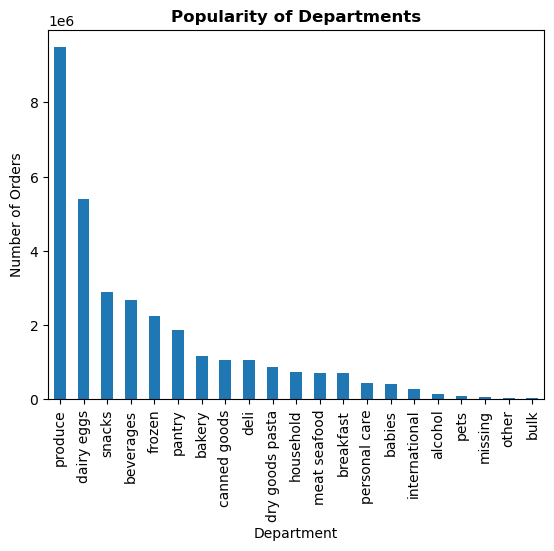

In [15]:
#bar chart for departments with the highest frequency of product orders
popular_dept_count = df_all['department'].value_counts(dropna=False)
popular_dept = popular_dept_count.plot.bar()
plt.title('Popularity of Departments', fontweight='bold')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.show()

5. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:

5b. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [17]:
df_all['order_freq_flag'].value_counts(dropna = False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: order_freq_flag, dtype: int64

In [18]:
loyalty_freq = pd.crosstab(df_all['loyalty_flag'], df_all['order_freq_flag'], dropna = False)

In [19]:
loyalty_freq

order_freq_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,10279960,0,4133
New customer,1648671,2724962,1870352
Regular customer,9631222,911475,5334079


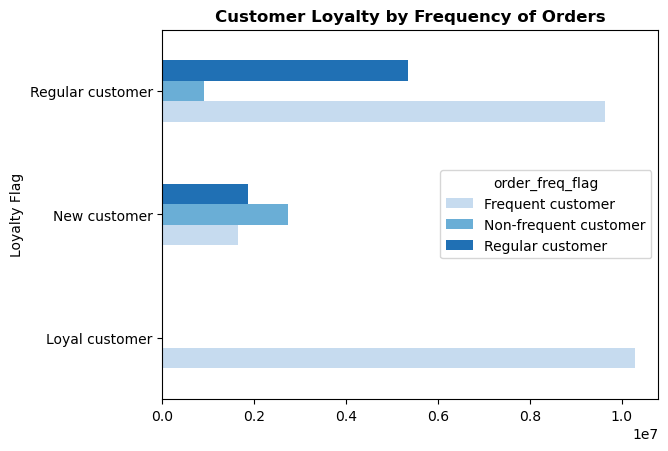

In [20]:
#bar chart customer loyalty by frequency of orders
loyalty_freq_bar = loyalty_freq.plot.barh(color = sns.color_palette('Blues', 3))
plt.title('Customer Loyalty by Frequency of Orders', fontweight = 'bold')
plt.ylabel('Loyalty Flag')
plt.show()

There are fewer new customers. The loyal customers are clearly the customers that shop at the most frequent rates.

5c. Are there differences in ordering habits based on a customer’s loyalty status?

In [21]:
df_all['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

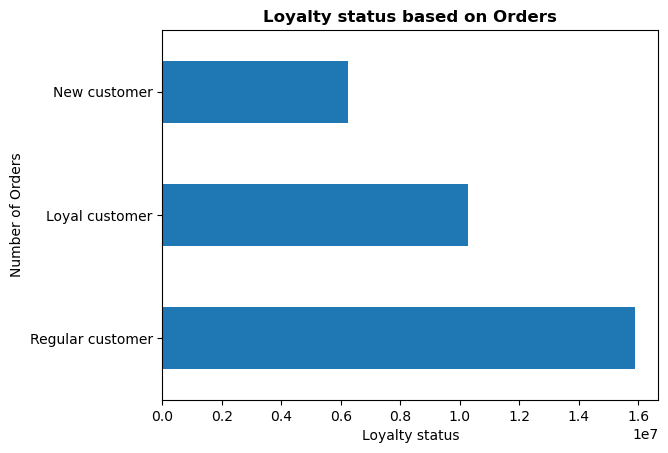

In [22]:
#bar chart based on loyalty status
loyalty_status = df_all['loyalty_flag'].value_counts(dropna=False)
loyalty_status_habits = loyalty_status.plot.barh()
plt.title('Loyalty status based on Orders', fontweight='bold')
plt.xlabel('Loyalty status')
plt.ylabel('Number of Orders')
plt.show()

The regular customers have the highest order numbers.

5d. Are there differences in ordering habits based on a customer’s region?

In [23]:
#customer orders by region
df_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

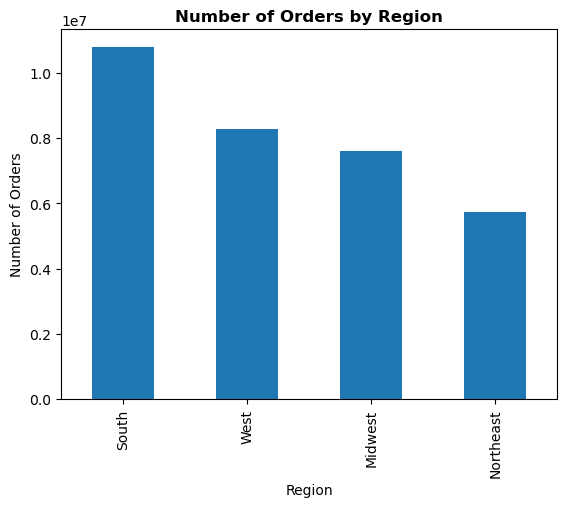

In [24]:
#bar chart number of orders broken down by regions
region_orders_count = df_all['region'].value_counts(dropna=False)
region_orders = region_orders_count.plot.bar()
plt.title('Number of Orders by Region', fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.show()

The South region has the highest order numbers.

5e. Is there a connection between age and family status in terms of ordering habits?

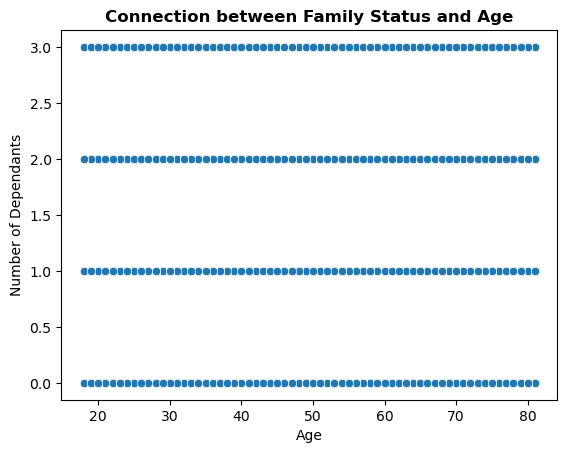

In [25]:
#scatterplot for family status and age
age_family = sns.scatterplot(x = 'age', y = 'number_dependants',data = df_all)
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.title('Connection between Family Status and Age', fontweight = 'bold')
plt.show()

In [26]:
#export visualizations
busiest_days.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/busiest_day_of_week.png')

In [27]:
busiest_hours.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/busiest_hours_of_day.png')

In [28]:
busiest_hours_price_bar.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/busiest_hours_price_bar.png')

In [29]:
busiest_dept.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/busiest_dept.png')

In [30]:
spending_flag_pie.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/spending_flag_pie.png')

In [31]:
popular_dept.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/popular_dept.png')

In [32]:
loyalty_freq_bar.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/loyalty_freq_distribution.png')

In [33]:
loyalty_status_habits.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/loyalty_status_habits.png')

In [34]:
region_orders.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/region_orders.png')

In [35]:
age_family.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva/04 Analysis/Visualizations/age_family.png')